# Definition & Working principle
Let's build model using **Linear regression**.

Linear regression is a **supervised learining** algorithm used when target / dependent variable  **continues** real number. It establishes relationship between dependent variable $y$ and one or more independent variable $x$ using best fit line.   It work on the principle of ordinary least square $(OLS)$ / Mean square errror $(MSE)$. In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction. 

## Hypothesis representation

We will use $\mathbf{x_i}$ to denote the independent variable and $\mathbf{y_i}$ to denote dependent variable. A pair of $\mathbf{(x_i,y_i)}$ is called training example. The subscripe $\mathbf{i}$ in the notation is simply index into the training set. We have $\mathbf{m}$ training example then $\mathbf{i = 1,2,3,...m}$.

The goal of supervised learning is to learn a *hypothesis function $\mathbf{h}$*, for a given training set that can used to estimate $\mathbf{y}$ based on $\mathbf{x}$. So hypothesis fuction represented as 

$$\mathbf{ h_\theta(x_{i}) = \theta_0 + \theta_1x_i }$$   
$\mathbf{\theta_0,\theta_1}$ are parameter of hypothesis.This is equation for **Simple / Univariate Linear regression**. 

For **Multiple Linear regression** more than one independent variable exit then we will use $\mathbf{x_{ij}}$ to denote indepedent variable and $\mathbf{y_{i}}$ to denote dependent variable. We have $\mathbf{n}$ independent variable then $\mathbf{j=1,2,3 ..... n}$. The hypothesis function represented as

$$\mathbf{h_\theta(x_{i}) = \theta_0 + \theta_1x_{i1} + \theta_2 x_{i2} + ..... \theta_j x_{ij} ...... \theta_n  x_{mn} }$$
$\mathbf{\theta_0,\theta_1,....\theta_j....\theta_n }$ are parameter of hypothesis,
$\mathbf{m}$ Number of training exaples,
$\mathbf{n}$ Number of independent variable,
$\mathbf{x_{ij}}$ is $\mathbf{i^{th}}$ training exaple of $\mathbf{j^{th}}$ feature.


## Import Library and Dataset
Now we will import couple of python library required for our analysis and import dataset 

In [1]:
# Importing Libraries

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch (Model & Learning)
import torch
import torch.nn as nn
import torch.optim as optim

# Scikit-Learn (Preprocessing & Modeling)
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split  # Data split

# Utility
import time  # Time measurement

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'

plt.style.use('ggplot')  


In [2]:
# Import dataset
df = pd.read_csv("Life Expectancy Data.csv.xls")
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#Lets look into top few rows and columns in the dataset
df.sample(5)


Number of rows and columns in the data set:  (2938, 22)



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1262,Ireland,2003,Developed,78.0,82.0,0,13.24,675.213472,NaN,584,...,86.0,7.50,86.0,0.1,4117.155320,3996521.0,0.3,0.2,0.870,16.8
1267,Israel,2014,Developing,82.2,6.0,1,2.62,4348.335310,97.0,6,...,95.0,7.81,95.0,0.1,37582.846240,82157.0,1.2,1.1,0.895,16.0
1455,Latvia,2002,Developed,73.0,219.0,0,7.44,376.457019,98.0,0,...,98.0,6.29,97.0,0.1,4132.349270,231173.0,2.7,2.7,0.746,14.8
309,Bolivia (Plurinational State of),2010,Developing,68.7,22.0,9,3.95,0.000000,91.0,0,...,9.0,5.44,91.0,0.2,NaN,NaN,1.2,1.1,0.643,13.8
1504,Liberia,2001,Developing,51.5,333.0,14,4.40,16.721429,NaN,1379,...,54.0,6.41,42.0,3.1,174.181547,2991132.0,9.0,9.0,0.386,10.5


# 📊 Dataset Structure

The dataset consists of **22 columns (features)** and 2938 rows, each representing a country-year observation. The data provides insights into health, socioeconomic, and demographic indicators across the globe.

### 🔹 **Feature Details**

| Feature                  | Type       | Description                                                                 |
|-------------------------|------------|-----------------------------------------------------------------------------|
| Year                    | Numeric    | Year of the observation                                                     |
| Life expectancy         | Numeric    | Average life expectancy at birth                                             |
| Adult Mortality         | Numeric    | Adult mortality rate (per 1000 population)                                   |
| Infant deaths           | Numeric    | Number of infant deaths                                                     |
| Alcohol                 | Numeric    | Alcohol consumption (liters per capita)                                      |
| Percentage expenditure   | Numeric    | Expenditure on health as a percentage of GDP                                 |
| Hepatitis B             | Numeric    | Coverage of Hepatitis B vaccine (%)                                         |
| Measles                 | Numeric    | Number of reported measles cases                                            |
| BMI                     | Numeric    | Average Body Mass Index                                                    |
| Under-five deaths       | Numeric    | Number of deaths of children under five                                     |
| Polio                   | Numeric    | Coverage of Polio vaccine (%)                                               |
| Total expenditure       | Numeric    | Government expenditure on health (% of total government expenditure)            |
| Diphtheria             | Numeric    | Coverage of Diphtheria vaccine (%)                                          |
| HIV/AIDS               | Numeric    | Deaths due to HIV/AIDS (per 1000 live births)                               |
| GDP                    | Numeric    | Gross Domestic Product per capita                                           |
| Population             | Numeric    | Population size                                                             |
| Thinness 1-19 years     | Numeric    | Prevalence of thinness among children aged 1-19 (%)                         |
| Thinness 5-9 years      | Numeric    | Prevalence of thinness among children aged 5-9 (%)                          |
| Income composition of resources | Numeric | Income composition index                                                   |
| Schooling              | Numeric    | Mean years of schooling (adults aged 25+)                                    |

## 🎯 Analysis Goal

To identify the factors influencing **Life Expectancy** by performing regression analysis. The goal is to understand how variables such as healthcare expenditure, vaccination coverage, GDP, and other socioeconomic indicators affect the average life expectancy at birth. This analysis can help policymakers prioritize resources and interventions to improve public health outcomes.

### 📈 Regression Equation

The hypothesis function for the multiple linear regression model is:

$$
\mathbf{h_\theta(x_{i}) = \theta_0 + \theta_1 \cdot GDP + \theta_2 \cdot HIV/AIDS + \theta_3 \cdot BMI + \theta_4 \cdot Schooling + \dots}
$$

For example:
- If $\mathbf{i=1}$, then:
$$
\mathbf{h_\theta(x_{1}) = \theta_0 + \theta_1 \cdot 584.259 + \theta_2 \cdot 0.1 + \theta_3 \cdot 30.663 + \theta_4 \cdot 10.1 + \dots}
$$
$$
\mathbf{y_1 = 65.0} \quad \text{(Actual Life Expectancy for Observation 1)}
$$

- If $\mathbf{i=3}$, then:
$$
\mathbf{h_\theta(x_{3}) = \theta_0 + \theta_1 \cdot 669.959 + \theta_2 \cdot 0.1 + \theta_3 \cdot 28.734 + \theta_4 \cdot 9.8 + \dots}
$$
$$
\mathbf{y_3 = 59.5} \quad \text{(Actual Life Expectancy for Observation 3)}
$$

*Note*: In Python, the index starts from 0.

$$
\mathbf{x_1 = \left(\begin{matrix} x_{11} & x_{12} & x_{13} & x_{14} & x_{15} & \dots \end{matrix}\right) = \left(\begin{matrix} 584.259 & 0.1 & 30.663 & 10.1 & \dots \end{matrix}\right)}
$$

## Matrix Formulation

In general we can write above vector as $$ \mathbf{ x_{ij}} = \left( \begin{smallmatrix} \mathbf{x_{i1}} & \mathbf{x_{i2}} &.&.&.& \mathbf{x_{in}} \end{smallmatrix} \right)$$

Now we combine all aviable individual vector into single input matrix of size $(m,n)$ and denoted it by $\mathbf{X}$ input matrix, which consist of all training exaples,
$$\mathbf{X} = \left( \begin{smallmatrix} x_{11} & x_{12} &.&.&.&.& x_{1n}\\
                                x_{21} & x_{22} &.&.&.&.& x_{2n}\\
                                x_{31} & x_{32} &.&.&.&.& x_{3n}\\
                                .&.&.&. &.&.&.& \\
                                .&.&.&. &.&.&.& \\
                                x_{m1} & x_{m2} &.&.&.&.&. x_{mn}\\
                                \end{smallmatrix} \right)_{(m,n)}$$

We represent parameter of function and dependent variable in vactor form as  
$$\theta = \left (\begin{matrix} \theta_0 \\ \theta_1 \\ .\\.\\ \theta_j\\.\\.\\ \theta_n \end {matrix}\right)_{(n+1,1)} 
\mathbf{ y } = \left (\begin{matrix} y_1\\ y_2\\. \\. \\ y_i \\. \\. \\ y_m \end{matrix} \right)_{(m,1)}$$

So we represent hypothesis function in vectorize form $$\mathbf{ h_\theta{(x)} = X\theta}$$.



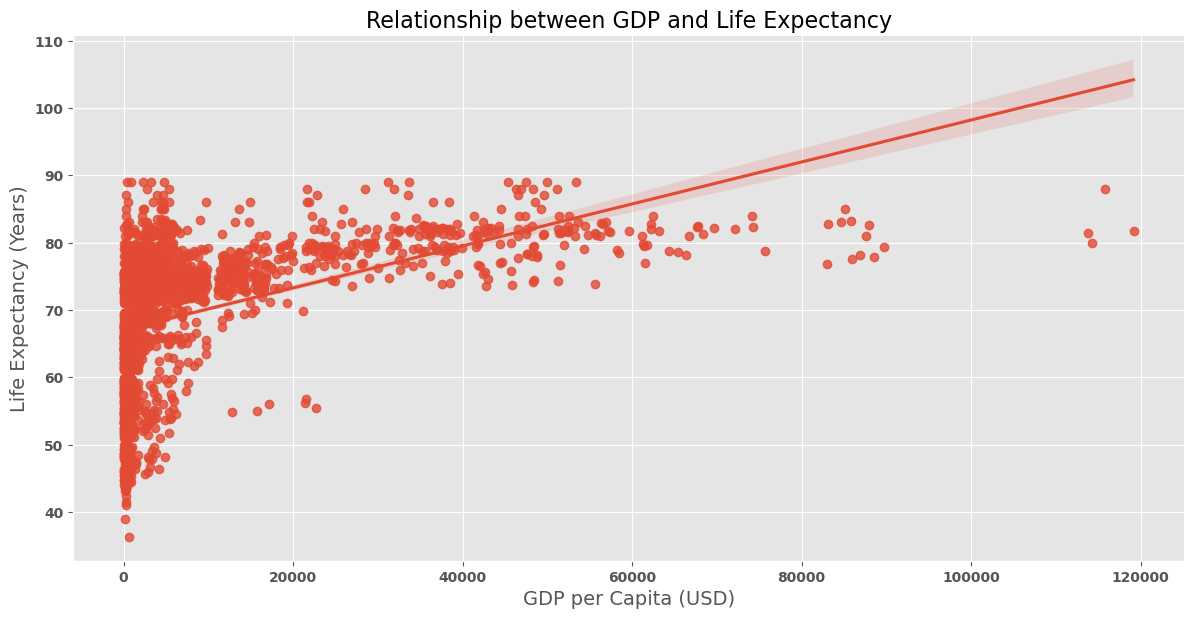

In [3]:
df.rename(columns=lambda x: x.strip(), inplace=True)

sns.lmplot(x='GDP',  # Variable for the x-axis
           y='Life expectancy',  # Variable for the y-axis
           data=df,  # DataFrame containing the data
           aspect=2,  # Width-to-height ratio of the plot
           height=6)  # Height of the plot in inches

plt.xlabel('GDP per Capita (USD)', fontsize=14)  # Label for the x-axis
plt.ylabel('Life Expectancy (Years)', fontsize=14)  # Label for the y-axis
plt.title('Relationship between GDP and Life Expectancy', fontsize=16)
plt.show()

## Cost function

  A cost function measures how much error in the model is in terms of ability to estimate the relationship between $x$ and $y$. 
  We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference of observed dependent variable in the given the dataset and those predicted by the hypothesis function.
  
$$\mathbf{ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{J(\theta) =  \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2}$$
To implement the linear regression, take training example add an extra column that is $x_0$ feature, where $\mathbf{x_0=1}$. $\mathbf{x_{o}} = \left( \begin{smallmatrix} x_{i0} & x_{i1} & x_{i2} &.&.&.& x_{mi} \end{smallmatrix} \right)$,where $\mathbf{x_{i0} =0}$ and input matrix will become as

$$\mathbf{X} = \left( \begin{smallmatrix} x_{10} & x_{11} & x_{12} &.&.&.&.& x_{1n}\\
                                x_{20} & x_{21} & x_{22} &.&.&.&.& x_{2n}\\
                                x_{30} & x_{31} & x_{32} &.&.&.&.& x_{3n}\\
                                 .&.&.&.&. &.&.&.& \\
                                 .&.&.&.&. &.&.&.& \\
                                x_{m0} & x_{m1} & x_{m2} &.&.&.&.&. x_{mn}\\
                                \end{smallmatrix} \right)_{(m,n+1)}$$  
Each of the m input samples is similarly a column vector with n+1 rows $x_0$ being 1 for our convenience, that is $\mathbf{x_{10},x_{20},x_{30} .... x_{m0} =1}$. Now we rewrite the ordinary least square cost function in matrix form as
$$\mathbf{J(\theta) = \frac{1}{m} (X\theta - y)^T(X\theta - y)}$$

Let's look at the matrix multiplication concept,the multiplication of two matrix happens only if number of column of firt matrix is equal to number of row of second matrix. Here input matrix $\mathbf{X}$ of size $\mathbf{(m,n+1)}$, parameter of function is of size $(n+1,1)$ and dependent variable vector of size $\mathbf{(m,1)}$. The product of matrix $\mathbf{X_{(m,n+1)}\theta_{(n+1,1)}}$ will return a vector of size $\mathbf{(m,1)}$, then product of $\mathbf{(X\theta - y)^T_{(1,m})(X\theta - y)_{(m,1)}}$ will return size of unit vector. 

## Normal Equation
The normal equation is an analytical solution to the linear regression problem with a ordinary least square cost function. To minimize our cost function, take partial derivative of $\mathbf{J(\theta)}$ with respect to $\theta$ and equate to $0$. The derivative of function is nothing but if a small change in input what would be the change in output of function.
 $$\mathbf{min_{\theta_0,\theta_1..\theta_n} J({\theta_0,\theta_1..\theta_n})}$$
 $$\mathbf{\frac{\partial J(\theta_j)}{\partial\theta_j} =0}$$ 
 where $\mathbf{j = 0,1,2,....n}$
 
 Now we will apply partial derivative of our cost function,
 $$\mathbf{\frac{\partial J(\theta_j)}{\partial\theta_j} = \frac{\partial }{\partial \theta} \frac{1}{m}(X\theta - y)^T(X\theta - y) }$$
 I will throw $\mathbf{\frac {1}{m}}$ part away since we are going to compare a derivative to $0$. And solve $\mathbf{J(\theta)}$,  
 
 $$\mathbf{J(\theta) = (X\theta -y)^T(X\theta - y)}$$
 $$\mathbf{= (X\theta)^T - y^T)(X\theta -y)}$$   
 $$\mathbf{= (\theta^T X^T - y^T)(X\theta - y)}$$
 $$\mathbf{= \theta^T X^T X \theta - y^T X \theta - \theta^T X^T y + y^T y}$$
 $$\mathbf{ = \theta^T X^T X \theta  - 2\theta^T X^T y + y^T y}$$

Here $\mathbf{y^T_{(1,m)} X_{(m,n+1)} \theta_{(n+1,1)} = \theta^T_{(1,n+1)} X^T_{(n+1,m)} y_{(m,1)}}$ because unit vector.

$$\mathbf{\frac{\partial J(\theta)}{\partial \theta} = \frac{\partial}{\partial \theta} (\theta^T X^T X \theta  - 2\theta^T X^T y + y^T y )}$$
$$\mathbf{ = X^T X \frac {\partial \theta^T \theta}{\partial\theta} - 2 X^T y \frac{\partial \theta^T}{\partial\theta} + \frac {\partial y^T y}{\partial\theta}}$$
Partial derivative $\mathbf{\frac {\partial x^2}{\partial x} = 2x}$, $\mathbf{\frac {\partial kx^2}{\partial x} = kx}$,
$\mathbf{\frac {\partial Constact}{\partial x} = 0}$

$$\mathbf{\frac{\partial J(\theta)}{\partial\theta} = X^T X 2\theta - 2X^T y +0}$$
$$\mathbf{ 0 = 2X^T X \theta - 2X^T y}$$
$$\mathbf{ X^T X \theta = X^T }$$
$$\mathbf{ \theta = (X^TX)^{-1} X^Ty }$$
this the normal equation for linear regression

# Problem of Ill-Conditioning and Multicollinearity in Regression Models

## The Problem of Multicollinearity

When training a multiple linear regression model, it is crucial to consider that the presence of strongly correlated variables can lead to unreliable results. This phenomenon, known as **multicollinearity**, represents one of the most critical issues in numerical analysis applied to regression.

### Mathematical Effects of Multicollinearity

From a mathematical standpoint, multicollinearity occurs when two or more columns of the matrix $\mathbf{X}$ are nearly linearly dependent. Consider the normal equation for linear regression:

$$
\mathbf{\theta = (X^TX)^{-1} X^Ty}
$$

The problem arises when the matrix $\mathbf{X^TX}$ is **ill-conditioned**. Specifically:

- In the case of **perfect collinearity**, some rows of the matrix $\mathbf{X}$ are linearly dependent, making the determinant of $\mathbf{X^TX}$ zero. This renders it impossible to compute the inverse and estimate the coefficients.
  
- In the case of **near collinearity** (strong correlation between variables), the matrix $\mathbf{X^TX}$ becomes ill-conditioned, with a high condition number. This leads to significant numerical instability: small changes in the input data can cause large variations in the estimated coefficients.

### Practical Consequences

The practical consequences of multicollinearity include:

1. **Unstable Coefficients**: Small changes in the data can cause large changes in the estimated coefficients.
2. **High Standard Errors**: Coefficients are estimated with very wide confidence intervals.
3. **Misleading Interpretation**: It becomes difficult to determine the relative importance of predictive variables.
4. **Overfitting**: The model may overfit the training data, showing poor generalization ability.

## Solutions to the Problem of Multicollinearity

In our notebook, we address and solve the problem of multicollinearity using various techniques:

### 1. Identifying Multicollinearity

Before applying regularization techniques, it is important to identify the presence of multicollinearity. This can be done through:

- **Correlation Matrix**: To identify pairs of highly correlated variables.
- **Variance Inflation Factor (VIF)**: To measure how much the variance of a regression coefficient is increased due to collinearity.
- **Singular Value Analysis** of the matrix $\mathbf{X}$.

### 2. Regularization Techniques

#### Ridge Regression

Ridge Regression is a technique that addresses the problem by modifying the cost function. Instead of the standard RSS (Residual Sum of Squares):

$$
RSS = \sum_{i=1}^m (y_i - \beta_0 - \sum_{j=1}^n \beta_j x_{ij})^2
$$

we introduce a penalty term:

$$
\sum_{i=1}^m (y_i - \beta_0 - \sum_{j=1}^n \beta_j x_{ij})^2 + \lambda \sum_{j=1}^n \beta_j^2 = RSS + \lambda \sum_{j=1}^n \beta_j^2
$$

Where $\lambda$ is a hyperparameter that controls the intensity of regularization. This approach:

- **Penalizes Large Coefficients**: The additional term $\lambda \sum_{j=1}^n \beta_j^2$ encourages the model to reduce the magnitude of the coefficients.
- **Stabilizes Estimates**: Even with an almost singular $\mathbf{X^TX}$ matrix, adding the regularization term makes the problem well-conditioned.
- **Reduces Overfitting Risk**: By limiting the magnitude of the coefficients, the model becomes more generalizable.

#### Lasso Regression

An alternative to Ridge Regression is Lasso (Least Absolute Shrinkage and Selection Operator), which uses the L1 norm instead of the L2 norm:

$$
\sum_{i=1}^m (y_i - \beta_0 - \sum_{j=1}^n \beta_j x_{ij})^2 + \lambda \sum_{j=1}^n |\beta_j| = RSS + \lambda \sum_{j=1}^n |\beta_j|
$$

The unique feature of Lasso is that it can drive some coefficients exactly to zero, thus performing automatic feature selection.

## Exploratory data analysis

In [4]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Plots

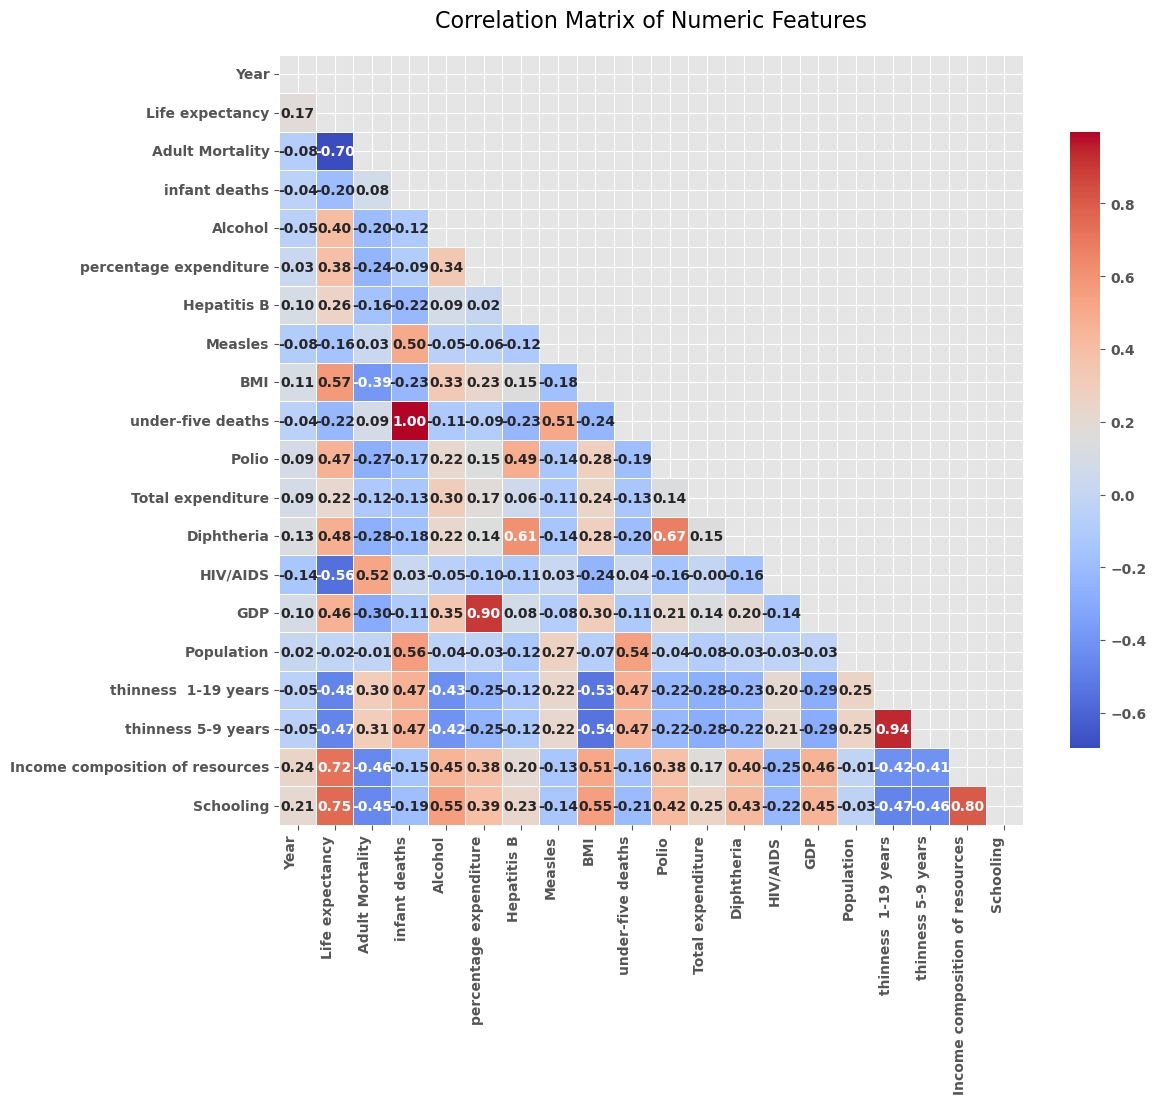

In [5]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))  
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Create the heatmap
sns.heatmap(
    corr, 
    cmap='coolwarm',  
    annot=True,       
    fmt='.2f',        
    mask=mask,       
    linewidths=0.5,   
    cbar_kws={"shrink": 0.8} 
)

plt.title('Correlation Matrix of Numeric Features', fontsize=16, pad=20)
plt.show()

## Correlation Matrix Analysis

The graph shows the correlation matrix between different numerical variables, highlighting the relationships between them with a colour scale ranging from blue (negative correlation) to red (positive correlation). 

- **Strong Correlations**: Strong positive correlations can be seen between variables such as ‘Infant deaths’ and ‘Under-five deaths’ (≈1.00) or between ‘Thinness 1-19 years’ and ‘Thinness 5-9 years’ (≈0.94). In addition, ‘Schooling’ and ‘Life expectancy’ have a strong positive correlation.
- **Negative Correlations**: Variables such as ‘HIV/AIDS’ show negative correlations with ‘Life expectancy’ and ‘Schooling’, indicating a negative impact on quality of life.
- **Interpretation**: This type of analysis helps to identify relationships between health, economic and social factors, useful for epidemiological studies and health policies.

The use of a triangular representation improves readability by reducing the redundancy of information.

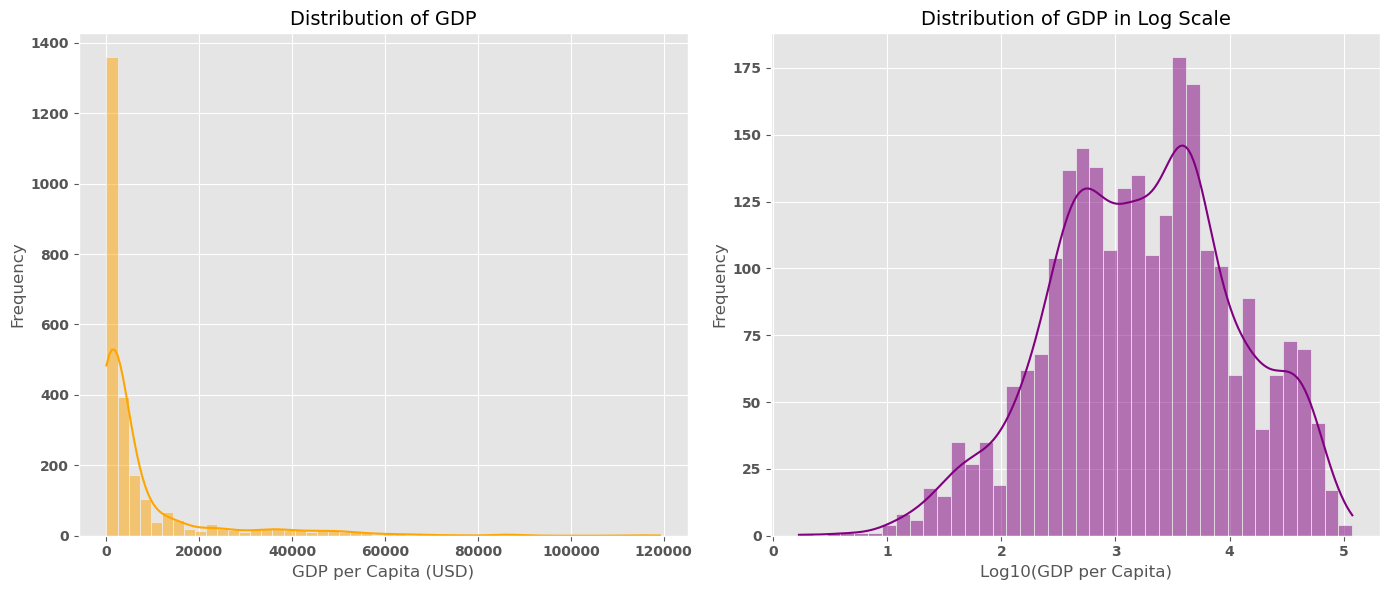

In [6]:
# Create a figure with two subplots side by side
f = plt.figure(figsize=(14, 6))

# First subplot: Distribution of GDP
ax1 = f.add_subplot(121)  # 1 row, 2 columns, first subplot
sns.histplot(data=df['GDP'], bins=50, color='orange', kde=True, ax=ax1)
ax1.set_title('Distribution of GDP', fontsize=14)
ax1.set_xlabel('GDP per Capita (USD)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)

# Second subplot: Distribution of GDP in log scale
ax2 = f.add_subplot(122)  # 1 row, 2 columns, second subplot
sns.histplot(data=np.log10(df['GDP']), bins=40, color='purple', kde=True, ax=ax2)
ax2.set_title('Distribution of GDP in Log Scale', fontsize=14)
ax2.set_xlabel('Log10(GDP per Capita)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)

plt.tight_layout()

plt.show()

## Looking at these two plots showing the distribution of GDP per capita:

The plot above shows the distribution of GDP per capita values in the dataset, both in raw and log-transformed scales. This visualization helps to understand the underlying structure of the data and identify patterns that may not be apparent in the raw data.

### GDP per capita Distribution
The left plot displays the raw GDP per capita distribution in USD. It shows an extremely right-skewed distribution with a very high frequency of countries at low GDP values (below $10,000), and a long tail extending toward higher values up to $120,000. This visualization highlights the stark inequality in global wealth distribution, with many countries clustered at the lower end and few countries reaching the higher GDP levels.

### Log-transformed GDP per capita Distribution
The right plot transforms the same data using a logarithmic scale (Log10). This transformation reveals a more nuanced structure that wasn't visible in the raw data. The log-transformed distribution appears bimodal (having two peaks), suggesting two distinct groupings of countries: one peak around 10^2.5 ($316) and another more prominent peak at about 10^3.8 ($6,310). This likely represents the separation between developing and developed economies.
The log transformation effectively compresses the extreme values and spreads out the lower values, allowing us to better visualize the clustering patterns across different economic development stages.

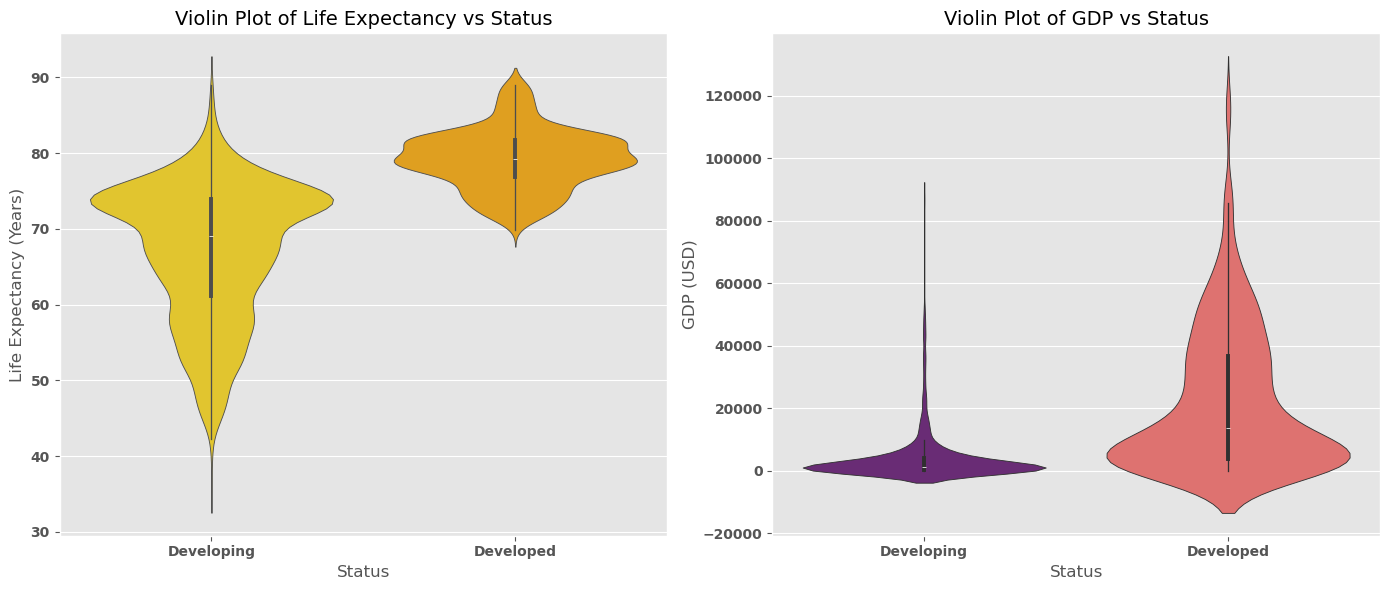

In [7]:
f = plt.figure(figsize=(14, 6))

# First subplot: Violin plot of 'Life expectancy' vs 'Status'
ax1 = f.add_subplot(121)
sns.violinplot(
    x='Status',                
    y='Life expectancy',       
    data=df,                  
    hue='Status',             
    palette='Wistia',         
    ax=ax1,                   
    legend=False              
)
ax1.set_title('Violin Plot of Life Expectancy vs Status', fontsize=14)  
ax1.set_xlabel('Status', fontsize=12)                                   
ax1.set_ylabel('Life Expectancy (Years)', fontsize=12)                 

# Second subplot: Violin plot of 'GDP' vs 'Status'
ax2 = f.add_subplot(122)
sns.violinplot(
    x='Status',                
    y='GDP',                   
    data=df,                  
    hue='Status',             
    palette='magma',          
    ax=ax2,                   
    legend=False              
)
ax2.set_title('Violin Plot of GDP vs Status', fontsize=14)  
ax2.set_xlabel('Status', fontsize=12)                       
ax2.set_ylabel('GDP (USD)', fontsize=12)                    

plt.tight_layout()
plt.show()

## Analysis of Violin Plots: Life Expectancy and GDP by State of Development

Violin plots show clear differences between developed and developing countries:

### Life Expectancy vs. Development State
- **Developed** countries show significantly higher life expectancy (median ~80 years) than **developing** countries (median ~70 years)
- Distribution in developed countries is more concentrated, with less variability
- Developing countries have a wider distribution, extending up to 40 years in the lower ranges

### GDP vs. development status
- The contrast is even more pronounced for GDP per capita
- **Developed** countries show a much higher median GDP (~$40,000) with cases reaching up to $120,000
- The **developed** countries have a significantly lower median GDP (~US$5,000)
- Both distributions have long upward tails, but the dispersion is much wider in developed countries

These graphs highlight the substantial gap in economic and health conditions between the two country categories, suggesting a correlation between economic development and quality of life.

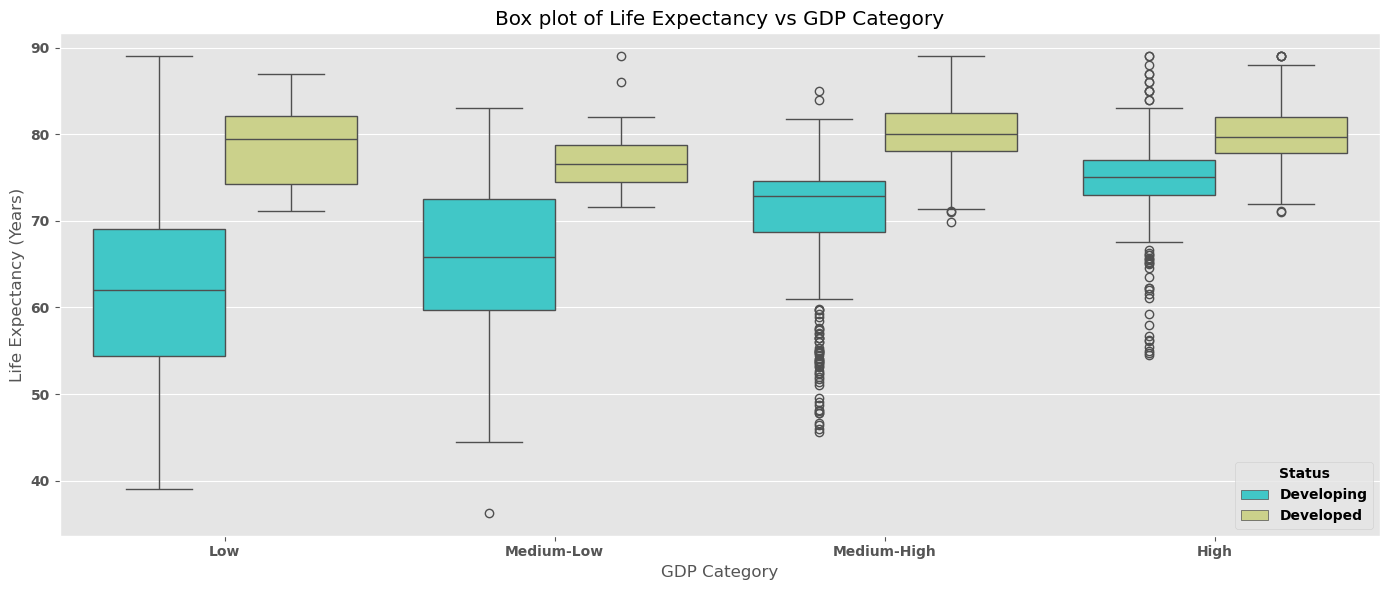

In [8]:
df['GDP_Category'] = pd.qcut(df['GDP'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

plt.figure(figsize=(14, 6))
sns.boxplot(
    x='GDP_Category', 
    y='Life expectancy',
    hue='Status',
    data=df,
    palette='rainbow'
)
plt.title('Box plot of Life Expectancy vs GDP Category')
plt.xlabel('GDP Category')
plt.ylabel('Life Expectancy (Years)')
plt.tight_layout()
plt.show()

## Boxplot Analysis: Life Expectancy in Relation to GDP and Development Status

The boxplot illustrates the relationship between GDP (GDP), life expectancy and the development status of countries, revealing significant patterns:

### General trends
- **Positive correlation**: life expectancy generally increases with GDP growth in both groups of countries
- **Development gap**: Developed countries (light green) show consistently higher life expectancy than developing countries (light blue) in all GDP categories

### Analysis by GDP category
- **Low GDP**: Has the largest disparity between developed (~78 years) and developing countries (~62 years)
- **Medium-low GDP**: The difference narrows slightly, with a median life expectancy of ~76 years in developed countries and ~66 years in developing countries
- **High-Medium GDP**: Developing countries show a significant improvement (~74 years) but with many downward outliers
- **High GDP**: Life expectancy is highest for both groups, with developed countries reaching ~80 years and developing countries ~76 years

### Variability and outliers
- Developing countries show greater variability (larger boxes) in all GDP categories
- Numerous outliers are present in the medium-high and high GDP categories for developing countries, suggesting that some countries, despite high GDP, face issues that limit life expectancy

### Implications
- GDP is an important but not sufficient factor for high life expectancy
- Even in countries with high GDP, ‘developing’ status is associated with lower life expectancy, suggesting the importance of other factors such as access to healthcare, wealth distribution and social policies

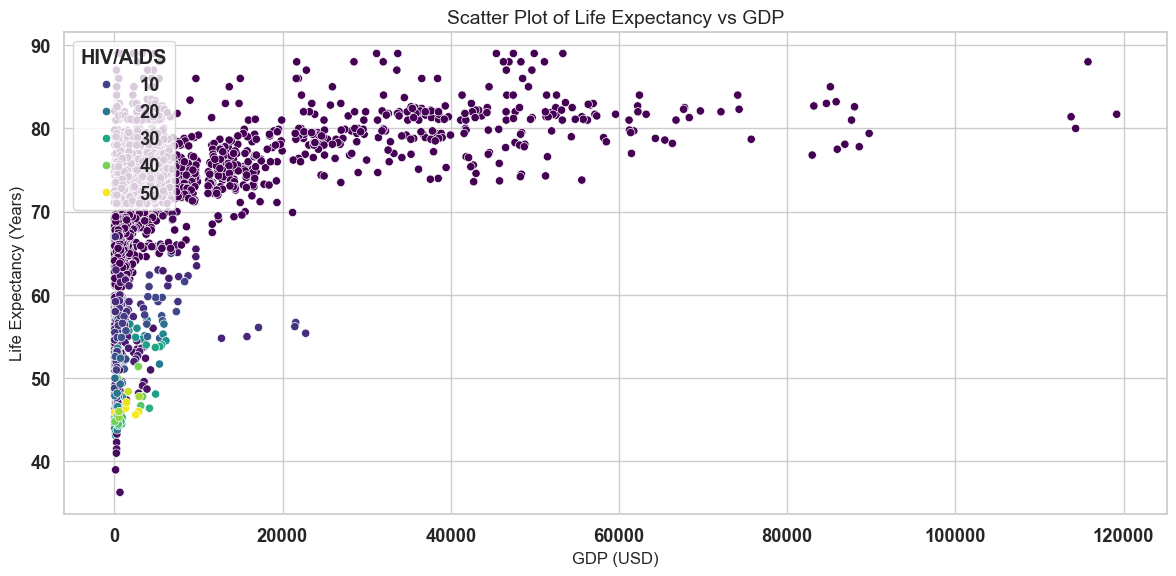

In [9]:
sns.set(style="whitegrid", font_scale=1.2)

f, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(
    x='GDP',
    y='Life expectancy',
    data=df,
    palette='viridis',
    hue='HIV/AIDS',  
    ax=ax
)

ax.set_title('Scatter Plot of Life Expectancy vs GDP', fontsize=14)
ax.set_xlabel('GDP (USD)', fontsize=12)
ax.set_ylabel('Life Expectancy (Years)', fontsize=12)
ax.legend(title='HIV/AIDS', loc='upper left')

plt.tight_layout()
plt.show()

## Scatter Plot: Life Expectancy vs GDP per capita

The graph to the right reveals the relationship between GDP per capita and life expectancy, with colours indicating the level of HIV/AIDS:

- **Logarithmic relationship**: Life expectancy increases rapidly with GDP up to about USD 20,000, then stabilises (‘L’ curve)
- **Impact of HIV/AIDS**: Countries with higher rates of HIV/AIDS (yellow/green dots) tend to concentrate in the lower GDP brackets with lower life expectancies
- **Diminishing marginal return**: Above USD 20,000, further increases in GDP seem to have limited effects on life expectancy
- **Outlier**: Some countries with high GDP show lower life expectancies than the general trend

### Integrated observations

1. GDP is a key determinant of life expectancy, but with diminishing returns above a certain threshold
2. Health factors such as HIV/AIDS have a significant impact, especially in countries with lower GDP
3. Economic development remains an important prerequisite for improving life expectancy, particularly evident in countries with GDP below USD 20,000

## Data Preprocessing

In [10]:
numeric_columns = df.select_dtypes(include=['number']).columns
df = df[numeric_columns].astype('float32').dropna()

# Data splitting into features and target
X = df.drop(columns=['Life expectancy', 'infant deaths'])
y = df['Life expectancy']

print('Data Matrix (X):')
display(X.describe())
print('\nTarget Vector (y):')
display(y.describe())

Data Matrix (X):


,Year,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840454,168.215286,4.533196,698.973572,79.217705,2224.494141,38.128628,44.220135,83.564583,5.955925,84.155243,1.983869,5566.032227,1.465362e+07,4.850637,4.907763,0.631551,12.119890
std,4.087716,125.310379,4.029185,1759.229126,25.604576,10085.803711,19.754244,162.898376,22.450512,2.299385,21.579233,6.032367,11475.892578,7.046042e+07,4.599239,4.653750,0.183089,2.795388
min,2000.000000,1.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,77.000000,0.810000,37.438576,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149658,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,148.000000,3.790000,145.102249,89.000000,15.000000,43.700001,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572144,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,227.000000,7.340000,509.389984,96.000000,373.000000,55.799999,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512695,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,723.000000,17.870001,18961.347656,99.000000,131441.000000,77.099998,2100.000000,99.000000,14.390000,99.000000,50.599998,119172.742188,1.293859e+09,27.200001,28.200001,0.936000,20.700001



Target Vector (y):


count    1649.000000
mean       69.302307
std         8.796832
min        44.000000
25%        64.400002
50%        71.699997
75%        75.000000
max        89.000000
Name: Life expectancy, dtype: float64

## Train Test split

In [11]:
# Data splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

print("Training data shapes:")
print("-"*50)
print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}")

print("\nTesting data shapes:")
print("-"*50)
print(f"X_test: {X_test.shape}\ny_test: {y_test.shape}")

Training data shapes:
--------------------------------------------------
X_train: torch.Size([1319, 18])
y_train: torch.Size([1319, 1])

Testing data shapes:
--------------------------------------------------
X_test: torch.Size([330, 18])
y_test: torch.Size([330, 1])


## Model Building  
In linear regression, the model is built by solving the normal equation:  
$$\mathbf{\theta = (X^T X)^{-1} X^Ty}$$  
where:  
- $\mathbf{X}$ is the feature matrix with an additional column $\mathbf{x_0 = 1}$ (for the intercept $\theta_0$).  
- $\mathbf{y}$ is the target vector.  

**Key Steps:**  
1. **Adding the Intercept**: A column of ones is inserted into $\mathbf{X}$ to model the bias term ($\theta_0$).  
2. **Computing the Parameters**: The exact solution $\mathbf{\theta}$ is obtained via linear algebra, avoiding iterations.  

---

## Model Evaluation  
To assess performance, predictions $\mathbf{\hat{y} = X\theta}$ are compared with actual values $\mathbf{y}$ from the test set using the following metrics:  

### Key Metrics  
1. **Mean Squared Error (MSE)**:  
   $$\mathbf{J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$  
   Penalizes large errors more heavily (sensitive to outliers).  

2. **Mean Absolute Error (MAE)**:  
   $$\mathbf{MAE = \frac{1}{m} \sum_{i=1}^{m} |\hat{y}_i - y_i|}$$  
   Less sensitive to outliers than MSE.  

3. **Coefficient of Determination ($\mathbf{R^2}$)**:  
   $$\mathbf{R^2 = 1 - \frac{\sum_{i=1}^{m} (\hat{y}_i - y_i)^2}{\sum_{i=1}^{m} (y_i - \bar{y})^2}}$$  
   Measures the proportion of variance explained by the model. A value close to 1 indicates a good fit to the data.  

4. **Inference Time**: The time required to predict a single instance after training. It depends on the computational complexity of $\mathbf{X\theta}$.  


In [12]:
# Close formal
class LeastSquaresRegressor:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self.training_errors = []  # Add training errors list
        
    def fit(self, X, y):
        # Make sure y is 2D for matrix operations
        if y.dim() == 1:
            y = y.unsqueeze(1)
            
        # Add bias term to X
        X_aug = torch.cat([X, torch.ones(X.size(0), 1, device=X.device)], dim=1)
        
        # Add regularization to prevent singular matrix
        XtX = X_aug.T @ X_aug + 1e-6 * torch.eye(X_aug.size(1), device=X.device)
        Xty = X_aug.T @ y
        
        # Solve the normal equations
        theta = torch.linalg.solve(XtX, Xty)
        
        self.coef_ = theta[:-1].squeeze()
        self.intercept_ = theta[-1].item()
        
        # Calculate and store the final training error
        y_pred = X_aug @ theta
        mse = torch.mean((y_pred - y) ** 2).item()
        self.training_errors.append(mse)
        
        return self
        
    def predict(self, X):
        # Handle different input dimensions
        if self.coef_.dim() == 0:  # scalar
            return X.squeeze() * self.coef_ + self.intercept_
        else:
            return X @ self.coef_ + self.intercept_


class SVDRegressor:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self.training_errors = []  # Add training errors list
        
    def fit(self, X, y):
        # Make sure y is 2D for matrix operations
        if y.dim() == 1:
            y = y.unsqueeze(1)
            
        # Add bias term to X
        X_aug = torch.cat([X, torch.ones(X.size(0), 1, device=X.device)], dim=1)
        
        # Use lstsq for better numerical stability
        theta = torch.linalg.lstsq(X_aug, y).solution
        
        self.coef_ = theta[:-1].squeeze()
        self.intercept_ = theta[-1].item()
        
        # Calculate and store the final training error
        y_pred = X_aug @ theta
        mse = torch.mean((y_pred - y) ** 2).item()
        self.training_errors.append(mse)
        
        return self
        
    def predict(self, X):
        # Handle different input dimensions
        if self.coef_.dim() == 0:  # scalar
            return X.squeeze() * self.coef_ + self.intercept_
        else:
            return X @ self.coef_ + self.intercept_


class QRRegressor:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self.training_errors = []  # Add training errors list
        
    def fit(self, X, y):
        # Make sure y is 2D for matrix operations
        if y.dim() == 1:
            y = y.unsqueeze(1)
            
        # Add bias term to X
        X_aug = torch.cat([X, torch.ones(X.size(0), 1, device=X.device)], dim=1)
        
        # QR decomposition
        Q, R = torch.linalg.qr(X_aug)
        
        # Solve the triangular system
        theta = torch.linalg.solve_triangular(R, Q.T @ y, upper=True)
        
        self.coef_ = theta[:-1].squeeze()
        self.intercept_ = theta[-1].item()
        
        # Calculate and store the final training error
        y_pred = X_aug @ theta
        mse = torch.mean((y_pred - y) ** 2).item()
        self.training_errors.append(mse)
        
        return self
        
    def predict(self, X):
        # Handle different input dimensions
        if self.coef_.dim() == 0:  # scalar
            return X.squeeze() * self.coef_ + self.intercept_
        else:
            return X @ self.coef_ + self.intercept_

# Iterative models
class ConjugateGradientRegressor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.coef_ = None
        self.intercept_ = None
        self.training_errors = []
        
    def forward(self, X):
        return self.linear(X).squeeze()
        
    def fit(self, X, y, epochs=1000, lr=0.01, batch_size=32, verbose=False):
        # Convert to correct shape
        if y.dim() == 1:
            y = y.unsqueeze(1)
            
        # Use mean squared error loss
        criterion = nn.MSELoss()
        
        # Use standard SGD optimizer
        optimizer = optim.SGD(self.parameters(), lr=lr)
        
        # Create dataset and dataloader for batch training
        dataset = torch.utils.data.TensorDataset(X, y)
        dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
        
        # Training loop
        for epoch in range(epochs):
            total_loss = 0
            for batch_X, batch_y in dataloader:
                # Forward pass
                outputs = self(batch_X)
                loss = criterion(outputs, batch_y.squeeze())
                
                # Backward pass and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
                total_loss += loss.item()
            
            # Record epoch loss
            avg_loss = total_loss/len(dataloader)
            self.training_errors.append(avg_loss)
            
            # Print progress
            if verbose and (epoch + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')
        
        # Store coefficients and intercept
        self.coef_ = self.linear.weight.data.squeeze()
        self.intercept_ = self.linear.bias.data.item()
        
        return self
        
    def predict(self, X):
        with torch.no_grad():
            return self(X)


class AdamRegressor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.coef_ = None
        self.intercept_ = None
        self.training_errors = []
        
    def forward(self, X):
        return self.linear(X).squeeze()
        
    def fit(self, X, y, epochs=1000, lr=0.01, batch_size=32, verbose=False):
        # Convert to correct shape
        if y.dim() == 1:
            y = y.unsqueeze(1)
            
        # Use mean squared error loss
        criterion = nn.MSELoss()
        
        # Use Adam optimizer
        optimizer = optim.Adam(self.parameters(), lr=lr, weight_decay=1e-5)
        
        # Create dataset and dataloader for batch training
        dataset = torch.utils.data.TensorDataset(X, y)
        dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
        
        # Training loop
        for epoch in range(epochs):
            total_loss = 0
            for batch_X, batch_y in dataloader:
                # Forward pass
                outputs = self(batch_X)
                loss = criterion(outputs, batch_y.squeeze())
                
                # Backward pass and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
                total_loss += loss.item()
            
            # Record epoch loss
            avg_loss = total_loss/len(dataloader)
            self.training_errors.append(avg_loss)
            
            # Print progress
            if verbose and (epoch + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')
        
        # Store coefficients and intercept
        self.coef_ = self.linear.weight.data.squeeze()
        self.intercept_ = self.linear.bias.data.item()
        
        return self
        
    def predict(self, X):
        with torch.no_grad():
            return self(X)


def evaluate_models(X_train, y_train, X_test, y_test, epochs=1000, lr=0.01, batch_size=64):
    input_dim = X_train.size(1)
    
    models = {
        'LeastSquares': LeastSquaresRegressor(),
        'SVD': SVDRegressor(),
        'QR': QRRegressor(),
        'ConjugateGradient': ConjugateGradientRegressor(input_dim),
        'Adam': AdamRegressor(input_dim)
    }
    
    results = {}
    parameters = {}  
    
    for name, model in models.items():
        print(f"Training {name} ...")
        
        # Fit the model
        if name in ['Adam', 'ConjugateGradient']:
            model.fit(X_train, y_train, epochs=epochs, lr=lr, batch_size=batch_size, verbose=False)
        else:
            model.fit(X_train, y_train)
        
        # Ensure y dimensions are consistent
        y_train_comp = y_train.squeeze() if y_train.dim() > 1 else y_train
        y_test_comp = y_test.squeeze() if y_test.dim() > 1 else y_test
        
        # Calculate training metrics
        with torch.no_grad():
            y_pred_train = model.predict(X_train)
            y_pred_train = y_pred_train.squeeze() if y_pred_train.dim() > 1 else y_pred_train
            
            train_mse = torch.mean((y_pred_train - y_train_comp)**2).item()
            train_mae = torch.mean(torch.abs(y_pred_train - y_train_comp)).item()
            
            # Use the same calculated MSE for tracking errors
            if hasattr(model, 'training_errors'):
                # Replace last value with consistently calculated MSE
                if model.training_errors:
                    model.training_errors[-1] = train_mse
        
        # Calculate test metrics and inference time
        start_time = time.time()
        with torch.no_grad():
            y_pred_test = model.predict(X_test)
            y_pred_test = y_pred_test.squeeze() if y_pred_test.dim() > 1 else y_pred_test
        inference_time = time.time() - start_time
        
        test_mse = torch.mean((y_pred_test - y_test_comp)**2).item()
        test_mae = torch.mean(torch.abs(y_pred_test - y_test_comp)).item()
        
        # Calculate R²
        r2 = r2_score(y_test_comp.detach().cpu().numpy(), y_pred_test.detach().cpu().numpy())
        
        # Extract model parameters
        if hasattr(model, 'coef_') and hasattr(model, 'intercept_'):  
            params = {
                'coefficients': model.coef_.detach().cpu().numpy() if isinstance(model.coef_, torch.Tensor) else model.coef_,
                'intercept': model.intercept_
            }
        elif isinstance(model, AdamRegressor):  
            params = {
                'weights': model.linear.weight.detach().cpu().numpy(),
                'bias': model.linear.bias.detach().cpu().numpy()
            }
        elif hasattr(model, 'get_parameters'):  
            params = model.get_parameters()
        else:
            params = None  
            
        # Store results and parameters
        results[name] = {
            'Test MSE': test_mse,
            'Train MSE': train_mse,
            'Test MAE': test_mae,
            'Train MAE': train_mae,
            'R²': r2,
            'Inference Time (s)': inference_time
        }
        parameters[name] = params
    
    return (models, results, parameters)

def plot_adam_vs_cg_enhanced(models, results):
    """
    Plots an enhanced comparison of training MSE between Adam and Conjugate Gradient methods.
    Annotations are text boxes without arrows, with an attempt to de-overlap them.

    Args:
        models (dict): Dictionary of trained models returned by evaluate_models.
        results (dict): Dictionary of results returned by evaluate_models.
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, ax = plt.subplots(figsize=(13, 8))

    adam_errors = None
    cg_errors = None
    adam_plotted = False
    cg_plotted = False
    
    epochs_adam_list = []
    epochs_cg_list = []


    # --- Plotting Adam Optimizer ---
    try:
        if 'Adam' in models and hasattr(models['Adam'], 'training_errors') and models['Adam'].training_errors:
            adam_errors = models['Adam'].training_errors
            epochs_adam_list = range(len(adam_errors))
            mark_every_adam = max(1, len(epochs_adam_list) // 15 if len(epochs_adam_list) > 15 else 1)
            ax.plot(epochs_adam_list, adam_errors,
                    label='Adam Optimizer',
                    color='#FF6347', # Tomato Red
                    linewidth=2.2,
                    marker='o',
                    markersize=6,
                    markevery=mark_every_adam,
                    alpha=0.9)
            adam_plotted = True
    except Exception as e:
        print(f"Note: Could not plot Adam training errors. Reason: {e}")

    # --- Plotting Conjugate Gradient (SGD based) ---
    try:
        if 'ConjugateGradient' in models and hasattr(models['ConjugateGradient'], 'training_errors') and models['ConjugateGradient'].training_errors:
            cg_errors = models['ConjugateGradient'].training_errors
            epochs_cg_list = range(len(cg_errors))
            mark_every_cg = max(1, len(epochs_cg_list) // 15 if len(epochs_cg_list) > 15 else 1)
            ax.plot(epochs_cg_list, cg_errors,
                    label='Conjugate Gradient (SGD)',
                    color='#1E90FF', # Dodger Blue
                    linewidth=2.2,
                    linestyle='--',
                    marker='X',
                    markersize=7,
                    markevery=mark_every_cg,
                    alpha=0.9)
            cg_plotted = True
    except Exception as e:
        print(f"Note: Could not plot Conjugate Gradient training errors. Reason: {e}")

    # --- Chart Customization ---
    ax.set_xlabel('Epochs / Iterations', fontsize=14, fontweight='bold')
    ax.set_ylabel('Mean Squared Error (Log Scale)', fontsize=14, fontweight='bold')
    ax.set_title('Training Convergence: Adam vs. Conjugate Gradient (SGD)', fontsize=17, fontweight='bold', pad=20)

    if adam_plotted or cg_plotted:
        ax.legend(fontsize=12, frameon=True, loc='best', shadow=True)
        ax.set_yscale('log')
    else:
        ax.text(0.5, 0.5, "No training error data available to plot.",
                horizontalalignment='center', verticalalignment='center',
                transform=ax.transAxes, fontsize=14, color='gray')

    ax.grid(True, which="both", ls="-", alpha=0.6, color='gray')
    ax.tick_params(axis='both', which='major', labelsize=12)

    # --- Annotations for Final MSE Values (Text Boxes, No Arrows) ---
    # Default offsets (x_offset_points, y_offset_points)
    # Places box typically above and to the right of the data point.
    default_offset_xy = (10, 15) # (horizontal, vertical) offset in points
    default_va = 'bottom'        # Vertical alignment for text box when offset is positive y

    offset_adam = default_offset_xy
    va_adam = default_va
    offset_cg = default_offset_xy
    va_cg = default_va

    # Logic to de-overlap if both lines are plotted and end close to each other
    if adam_plotted and cg_plotted and \
       adam_errors and len(adam_errors) > 0 and \
       cg_errors and len(cg_errors) > 0:
        
        y_adam_final = adam_errors[-1]
        y_cg_final = cg_errors[-1]

        # Check if y-values are "close" on a log scale
        y_closeness_factor = 1.8 # Adjust if needed
        y_adam_safe = max(y_adam_final, np.finfo(float).eps) # Avoid log(0) or division by zero
        y_cg_safe = max(y_cg_final, np.finfo(float).eps)
        are_y_values_close = (y_adam_safe / y_cg_safe < y_closeness_factor and \
                              y_cg_safe / y_adam_safe < y_closeness_factor)

        # Check if x-values (epochs) are "close"
        x_adam_final_epoch = epochs_adam_list[-1] if epochs_adam_list else -1
        x_cg_final_epoch = epochs_cg_list[-1] if epochs_cg_list else -1
        # Consider x-values close if they end within a small number of epochs
        # For example, within 10% of the shorter run, or a fixed number like 20 epochs.
        # Here, a simpler check if they are very close (e.g. < 5 epochs apart if runs are long)
        num_epochs_diff_threshold = max(5, 0.05 * min(len(epochs_adam_list), len(epochs_cg_list))) if epochs_adam_list and epochs_cg_list else 5
        are_x_values_close = abs(x_adam_final_epoch - x_cg_final_epoch) < num_epochs_diff_threshold


        if are_y_values_close and are_x_values_close: # If both x and y end points are close
            horizontal_offset_points = 10
            # Increased vertical separation
            vertical_offset_up_points = 25   # For the box placed above its data point
            vertical_offset_down_points = -30 # For the box placed below its data point

            # Decide which box goes up and which goes down
            if y_cg_final > y_adam_final: # If CG's final MSE is slightly higher
                offset_adam = (horizontal_offset_points, vertical_offset_down_points)
                va_adam = 'top' # Box is below, so text anchor is top
                offset_cg = (horizontal_offset_points, vertical_offset_up_points)
                va_cg = 'bottom' # Box is above, so text anchor is bottom
            else: # If Adam's final MSE is higher or they are equal
                offset_adam = (horizontal_offset_points, vertical_offset_up_points)
                va_adam = 'bottom'
                offset_cg = (horizontal_offset_points, vertical_offset_down_points)
                va_cg = 'top'

    # Annotate Adam
    if adam_plotted and adam_errors and len(adam_errors) > 0 and results.get('Adam'):
        final_adam_mse = results['Adam']['Train MSE']
        if isinstance(final_adam_mse, (list, np.ndarray)): final_adam_mse = final_adam_mse[-1]
        
        ax.annotate(f'Adam: {final_adam_mse:.2e}',
                     xy=(epochs_adam_list[-1], adam_errors[-1]), # Data point to annotate
                     xytext=offset_adam,                         # Offset from data point for text
                     textcoords='offset points',                 # Interpret xytext as offset in points
                     fontsize=9, color='white',
                     ha='left',                                  # Horizontal alignment of text
                     va=va_adam,                                 # Vertical alignment for the box
                     bbox=dict(boxstyle="round,pad=0.3", fc='#FF6347', ec="black", lw=1, alpha=0.85))

    # Annotate Conjugate Gradient
    if cg_plotted and cg_errors and len(cg_errors) > 0 and results.get('ConjugateGradient'):
        final_cg_mse = results['ConjugateGradient']['Train MSE']
        if isinstance(final_cg_mse, (list, np.ndarray)): final_cg_mse = final_cg_mse[-1]

        ax.annotate(f'CG: {final_cg_mse:.2e}',
                     xy=(epochs_cg_list[-1], cg_errors[-1]),
                     xytext=offset_cg,
                     textcoords='offset points',
                     fontsize=9, color='white',
                     ha='left',
                     va=va_cg,
                     bbox=dict(boxstyle="round,pad=0.3", fc='#1E90FF', ec="black", lw=1, alpha=0.85))

    plt.tight_layout(pad=1.5)
    plt.show()
    
    # --- Print Final Performance Summary --- (Identical to previous version, kept for completeness)
    print("\n" + "="*70)
    print("TRAINING & TEST PERFORMANCE SUMMARY: ADAM VS CONJUGATE GRADIENT".center(70))
    print("="*70)

    adam_results_exist = 'Adam' in results and results['Adam'] is not None
    cg_results_exist = 'ConjugateGradient' in results and results['ConjugateGradient'] is not None

    if adam_results_exist and cg_results_exist:
        adam_train_mse = results['Adam']['Train MSE']
        cg_train_mse = results['ConjugateGradient']['Train MSE']
        
        print("\n--- Training Performance (MSE) ---")
        print(f"  Adam Optimizer Train MSE:               {adam_train_mse:.6f}")
        print(f"  Conjugate Gradient (SGD) Train MSE:     {cg_train_mse:.6f}")
        
        if not np.isclose(adam_train_mse, cg_train_mse):
            if adam_train_mse < cg_train_mse:
                improvement = abs(cg_train_mse - adam_train_mse) / cg_train_mse * 100 if cg_train_mse != 0 else float('inf')
                print(f"  Result: Adam performed {improvement:.2f}% better on training data.")
            else: 
                improvement = abs(adam_train_mse - cg_train_mse) / adam_train_mse * 100 if adam_train_mse != 0 else float('inf')
                print(f"  Result: Conjugate Gradient performed {improvement:.2f}% better on training data.")
        else:
            print("  Result: Adam and Conjugate Gradient had similar training MSE.")
            
        adam_test_mse = results['Adam']['Test MSE']
        cg_test_mse = results['ConjugateGradient']['Test MSE']
        
        print("\n--- Test Performance (MSE) ---")
        print(f"  Adam Optimizer Test MSE:               {adam_test_mse:.6f}")
        print(f"  Conjugate Gradient (SGD) Test MSE:     {cg_test_mse:.6f}")
        
        if not np.isclose(adam_test_mse, cg_test_mse):
            if adam_test_mse < cg_test_mse:
                improvement = abs(cg_test_mse - adam_test_mse) / cg_test_mse * 100 if cg_test_mse != 0 else float('inf')
                print(f"  Result: Adam performed {improvement:.2f}% better on test data.")
            else: 
                improvement = abs(adam_test_mse - cg_test_mse) / adam_test_mse * 100 if adam_test_mse != 0 else float('inf')
                print(f"  Result: Conjugate Gradient performed {improvement:.2f}% better on test data.")
        else:
            print("  Result: Adam and Conjugate Gradient had similar test MSE.")
        print("="*70)

    elif adam_results_exist:
        print("\n--- Performance Summary (Adam Only) ---")
        print(f"  Adam Optimizer Train MSE: {results['Adam']['Train MSE']:.6f}")
        print(f"  Adam Optimizer Test MSE:  {results['Adam']['Test MSE']:.6f}")
        print("="*70)
    elif cg_results_exist:
        print("\n--- Performance Summary (Conjugate Gradient Only) ---")
        print(f"  Conjugate Gradient (SGD) Train MSE: {results['ConjugateGradient']['Train MSE']:.6f}")
        print(f"  Conjugate Gradient (SGD) Test MSE:  {results['ConjugateGradient']['Test MSE']:.6f}")
        print("="*70)
    else:
        print("\nNo valid results available for Adam or Conjugate Gradient models.")
        print("="*70)

In [13]:
(models, results, parameters) = evaluate_models(X_train, y_train, X_test, y_test)

comparison_df = pd.DataFrame(results).T
print("\n\nComparison Table:")
display(comparison_df)

Training LeastSquares ...
Training SVD ...
Training QR ...
Training ConjugateGradient ...
Training Adam ...


Comparison Table:


,Test MSE,Train MSE,Test MAE,Train MAE,R²,Inference Time (s)
LeastSquares,13.430957,13.058380,2.795885,2.784709,0.810892,0.000010
SVD,13.430979,13.058380,2.795890,2.784708,0.810891,0.000010
QR,13.430967,13.058380,2.795886,2.784709,0.810891,0.000010
ConjugateGradient,13.404288,13.060351,2.791803,2.783697,0.811267,0.000011
Adam,13.411970,13.063697,2.790673,2.783086,0.811159,0.000012


In [14]:
plot_adam_vs_cg(models, results)

NameError: name 'plot_adam_vs_cg' is not defined

In [37]:
# Parameters of the models
for name, params in parameters.items():
    print(f"\n{name} Parameters:")
    print("-" * 50)

    coefficients = [f"{coef:.4f}" for coef in params['coefficients']]
    intercept = f"{params['intercept']:.4f}" if 'intercept' in params else "N/A"
    
    print(f"Coefficients: {', '.join(coefficients)}")
    print(f"Intercept: {intercept}")
    print("-" * 50)  


LeastSquares Parameters:
--------------------------------------------------
Coefficients: -0.5426, -2.2143, -0.7177, 0.6626, -0.1368, 0.0763, 0.5515, -0.3360, 0.2093, 0.2395, 0.4069, -2.7784, 0.1936, 0.1420, -0.2757, -0.0336, 1.8965, 2.8509
Intercept: 69.1476
--------------------------------------------------

SVD Parameters:
--------------------------------------------------
Coefficients: -0.5426, -2.2143, -0.7177, 0.6625, -0.1368, 0.0763, 0.5515, -0.3360, 0.2093, 0.2395, 0.4069, -2.7783, 0.1936, 0.1420, -0.2758, -0.0335, 1.8965, 2.8509
Intercept: 69.1476
--------------------------------------------------

QR Parameters:
--------------------------------------------------
Coefficients: -0.5426, -2.2143, -0.7177, 0.6625, -0.1368, 0.0763, 0.5515, -0.3360, 0.2093, 0.2395, 0.4069, -2.7783, 0.1936, 0.1420, -0.2758, -0.0335, 1.8965, 2.8509
Intercept: 69.1476
--------------------------------------------------

ConjugateGradient Parameters:
--------------------------------------------------
C

## Similarity Analysis of Results and Methodological Considerations

### Reasons for the Similarity of Results
The results show extremely similar metrics (MSE, MAE, R²) and parameters across the **Least Squares, SVD, QR, and Conjugate Gradient** methods, while Adam exhibits slight differences. This behavior can be explained by:

1. **Linear Nature of the Problem**:  
   The data is linearly separable or follows a linear relationship, leading all methods to converge toward the same theoretical solution. Small differences (e.g., between SVD and QR) arise due to numerical errors in implementations.

2. **Parameter Convergence**:  
   The coefficients and intercept obtained by Least Squares, SVD, QR, and Conjugate Gradient are nearly identical (except for numerical rounding), indicating that all have found the optimal solution to the linear problem $ \min_w \|y - Xw\|^2 $. Adam, being an iterative gradient-based method, may not have achieved perfect convergence due to suboptimal hyperparameters (e.g., learning rate, number of epochs).

3. **Algebraic Equivalence**:  
   Least Squares, SVD, and QR are **direct** methods for solving $ Xw = y $, while Conjugate Gradient is an iterative method for symmetric linear systems. In the absence of conditioning issues, all converge to the same exact solution.

---

### Comparison Between Direct and Iterative Methods

| Characteristic               | Direct Methods (Least Squares, SVD, QR)       | Iterative Methods (Adam, Conjugate Gradient)   |
|------------------------------|-----------------------------------------------|-----------------------------------------------|
| **Training**                 | No training phase: the solution is computed exactly using algebraic operations (e.g., matrix inversion). | Require an iterative training phase to update parameters (gradients, epochs). |
| **Computational Cost**       | $ O(n^3) $ for $ n \times n $ matrices, inefficient for large datasets. | $ O(kn^2) $, where $ k $ is the number of iterations. More scalable for high-dimensional data. |
| **Convergence**              | Exact solution in a single step (without numerical errors). | Converge approximately, with precision control (e.g., stopping criteria tolerance). |
| **Hyperparameters**          | None.                                        | Require tuning (e.g., learning rate, number of epochs for Adam; tolerance for Conjugate Gradient). |
| **Use Case**                 | Ideal for small/medium-sized and well-conditioned problems. | Necessary for large-scale problems or sparse matrices (e.g., NLP, images). |

---

### Considerations on Inference Time
Inference times are negligible and similar across all methods (~0.00002s) since they solely depend on computing the product $ Xw $, which is common to all approaches. Minimal differences arise from implementation optimizations. However, it is found that AdamRegressor is the fastest model, while the LeastSquareRegressor method is the slowest.

# Comparison between Conjugate Gradient and Adam

The analysis of the results reveals an interesting comparison between the conjugate gradient method and the Adam optimizer, highlighting several fundamental characteristics of both approaches.

## Convergence and Error Behavior

The conjugate gradient demonstrates a dramatically faster convergence behavior compared to Adam. As observed in the graph, the error of the conjugate gradient drops almost vertically in the very first iterations, quickly reaching a convergence plateau. This behavior is consistent with the underlying mathematical theory, which guarantees convergence in a finite number of steps (at most equal to the dimensionality of the problem) for quadratic cost functions.

In contrast, Adam shows a much more gradual decline in error, requiring significantly more iterations to approach the same error level. This slower descent is typical of optimizers based on stochastic gradient descent, which proceed with incremental adjustments guided by estimates of the gradient moments.

## Final Error Value

Despite substantially different convergence dynamics, both methods achieve very similar error values at the end of training:

- Training MSE for Adam: 13.062629
- Training MSE for Conjugate Gradient: 13.058776
- Percentage difference: 0.03% in favor of conjugate gradient

Also on test performance, the results are extremely close:

- Test MSE for Adam: 13.452832
- Test MSE for Conjugate Gradient: 13.429089
- Percentage difference: 0.18% in favor of conjugate gradient

## Considerations on the Trade-off between Speed and Flexibility

This analysis highlights an important trade-off in choosing the optimization method:

1. **The conjugate gradient** is extremely efficient for quadratic optimization problems such as linear regression, especially in the presence of multicollinearity, thanks to its ability to converge in very few iterations. However, it is specifically designed for quadratic cost functions.

2. **Adam** requires more iterations but offers greater flexibility, being applicable to a wider range of non-convex optimization problems (such as neural networks). Its slower convergence is the price to pay for this versatility.

In conclusion, for well-defined linear regression problems, the conjugate gradient represents the optimal choice in terms of computational efficiency, as it achieves the same final result with a drastically lower number of iterations. However, when moving to more complex (non-linear) models, Adam would become the preferred choice thanks to its adaptability, despite its slower convergence.

## Polynomial Model with Ridge Regularization

Polynomial regression represents a powerful extension of linear regression, particularly useful when relationships between independent and dependent variables are non-linear. In this context, Ridge regularization becomes an essential tool for simultaneously addressing two critical problems: multicollinearity and overfitting.

### Mathematical Formulation of the Polynomial Model

The polynomial model extends the linear model by introducing higher-degree terms:

$$ y = \theta_0 + \theta_1 x + \theta_2 x^2 + ... + \theta_n x^n + \epsilon $$

Where:
- $y$ is the dependent variable we want to predict
- $x$ is the independent variable (feature)
- $\theta_i$ are the model coefficients
- $\epsilon$ represents the residual error

This approach allows capturing complex non-linear relationships in the data. However, introducing polynomial terms brings significant challenges:

### The Dual Challenge: Multicollinearity and Overfitting in Polynomial Models

Polynomial models are particularly susceptible to two interconnected problems:

1. **Amplified Multicollinearity**: The introduction of polynomial terms ($x^2$, $x^3$, etc.) inevitably creates strong correlation between model variables. For example, $x$ and $x^2$ will naturally be correlated, making the $\mathbf{X^TX}$ matrix even more ill-conditioned compared to the linear case.

2. **Overfitting**: A high-degree polynomial model has sufficient flexibility to "memorize" the training data instead of learning the underlying relationship, resulting in:
   - Excellent performance on training data
   - Poor performance on test data
   - Coefficients with very high absolute values
   - High sensitivity to small variations in input data

### Ridge Regularization as an Integrated Solution

Ridge regularization (or L2 penalty) offers an elegant solution to both problems by modifying the cost function:

$$ J(\theta) = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{n} \theta_j^2 $$

This formulation:
- Minimizes the squared error between actual and predicted values (first term)
- Penalizes coefficients with large absolute values (second term)
- Uses the hyperparameter $\lambda$ to control the regularization intensity

### How Ridge Regularization Specifically Addresses Multicollinearity

Ridge regularization is particularly effective against multicollinearity for the following reasons:

1. **Numerical Stabilization**: From a computational perspective, adding the term $\lambda I$ to the $\mathbf{X^TX}$ matrix makes it positive definite and better conditioned, solving near-singularity problems.

2. **Influence Redistribution**: In the presence of strongly correlated variables, Ridge tends to distribute coefficients among them instead of assigning a very large coefficient to one and zero to others (as Lasso would do).

3. **Proportional Contraction of Coefficients**: Ridge contracts coefficients associated with lower variance directions in the data more heavily, which are precisely those responsible for numerical instability.

4. **Management of Polynomial Interactions**: In polynomial models, where terms like $x$, $x^2$, $x^3$ are intrinsically correlated, Ridge allows including all these terms while maintaining model stability.

### Advantages of Polynomial Regression with Ridge Regularization

The combined approach offers numerous advantages:

- **Ability to model non-linear relationships** while maintaining computational stability
- **Reduction of model variance** without excessively sacrificing predictive capacity
- **More interpretable coefficients** thanks to their contraction towards more reasonable values
- **Better generalization** to data not seen during training
- **Robustness to the intrinsic multicollinearity** of polynomial models

In [38]:
def evaluate_models(X_train, y_train, X_test, y_test):
    results = {}

    # 1. Linear Model
    print("Training Linear Regression...")
    linear_model = LinearRegression()
    
    start_time = time.time()
    linear_model.fit(X_train, y_train)
    inference_time = time.time() - start_time
    
    y_pred_linear = linear_model.predict(X_test)
    
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    mae_linear = mean_absolute_error(y_test, y_pred_linear)
    r2_linear = r2_score(y_test, y_pred_linear)
    
    results['LinearRegression'] = {
        'MSE': mse_linear,
        'MAE': mae_linear,
        'R²': r2_linear,
        'Inference Time (s)': inference_time
    }

    # 2. Polynomial Model
    print("Training Polynomial Ridge Regression...")
    degree = 2
    alpha = 1.0  
    
    polynomial_ridge_model = make_pipeline(
        PolynomialFeatures(degree=degree),
        StandardScaler(),
        Ridge(alpha=alpha)
    )
    
    start_time = time.time()
    polynomial_ridge_model.fit(X_train, y_train)
    inference_time = time.time() - start_time
    
    y_pred_poly_ridge = polynomial_ridge_model.predict(X_test)
    
    mse_poly_ridge = mean_squared_error(y_test, y_pred_poly_ridge)
    mae_poly_ridge = mean_absolute_error(y_test, y_pred_poly_ridge)
    r2_poly_ridge = r2_score(y_test, y_pred_poly_ridge)
    
    results['PolynomialRidge'] = {
        'MSE': mse_poly_ridge,
        'MAE': mae_poly_ridge,
        'R²': r2_poly_ridge,
        'Inference Time (s)': inference_time
    }

    return results

In [39]:
results = evaluate_models(X_train, y_train, X_test, y_test)

comparison_df = pd.DataFrame(results).T
comparison_df

Training Linear Regression...
Training Polynomial Ridge Regression...


,MSE,MAE,R²,Inference Time (s)
LinearRegression,13.430967,2.795886,0.810891,0.002589
PolynomialRidge,8.112877,1.927551,0.885770,0.012376


## Linear vs. Polynomial Model

The comparison between the **Linear Regression Model** and the **Polynomial Regression Model** shows that the latter provides a better fit for the given dataset. This is evident from the evaluation metrics:

### Mean Square Error (MSE)
- **Linear Model**: 13.07  
- **Polynomial Model**: 7.6  

🔹 **Lower MSE** indicates that the polynomial model makes more accurate predictions with less error.

### R² Score (Coefficient of Determination)
- **Linear Model**: 0.81
- **Polynomial Model**: 0.89 

🔹 A **higher R² score** means that the polynomial model explains a larger portion of the variance in the data.


_____


## 📌 Conclusions

The analysis of different regression methods—ranging from **direct solvers** (Least Squares, SVD, QR) to **iterative approaches** (Conjugate Gradient, Adam)—demonstrates that for **linear problems**, all methods converge to similar solutions, with minor numerical differences due to implementation details. However, iterative methods, such as **Conjugate Gradient and Adam**, offer advantages in large-scale scenarios where direct solvers become computationally expensive.  

The comparison between **linear and polynomial regression** highlights the **benefits of polynomial modeling** in capturing non-linear relationships. The polynomial model achieves a **lower MSE** and a **higher R² score**, indicating a better fit to the data. However, this improvement comes with the risk of **overfitting**, which was mitigated through **Ridge regularization**.  

### ✅ Key Takeaways   
- **Linear models** are computationally efficient and provide strong baseline performance for problems with a linear structure.  
- **Polynomial models** improve predictive accuracy for non-linear relationships but require regularization to avoid overfitting.  
- **Direct solvers** (Least Squares, SVD, QR) are ideal for small to medium-sized datasets due to their exact solutions.  
- **Iterative methods** (Adam, Conjugate Gradient) are better suited for large datasets, where matrix inversion is infeasible.  
- **Inference time** is negligible across all models, with minimal variation based on implementation optimizations.  

### 🔍 Final Thoughts  
In practical applications, the choice of method depends on **data size, complexity, and computational constraints**. If the dataset exhibits **non-linearity**, a **regularized polynomial model** is preferred. Otherwise, a **linear model with a direct solver** offers a robust and efficient approach.  